In [32]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
url='https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt'

In [34]:
data = pd.read_csv(url,index_col = 'Unnamed: 0')

In [35]:
data

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
644,1359.156,7,15,3,2,2,45000
645,377.148,4,10,1,1,1,24800
646,740.064,13,14,1,1,1,45000
647,1707.840,3,14,3,2,2,65000


1. Data cleaning & getting rid of irrelevant information before clustering

2. Finding the optimal value of k

3. Storing cluster to which the house belongs along with the data

In [36]:
data.rename(columns = {'Living.Room' :'Living_Room'})

,Sqft,Floor,TotalFloor,Bedroom,Living_Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
644,1359.156,7,15,3,2,2,45000
645,377.148,4,10,1,1,1,24800
646,740.064,13,14,1,1,1,45000
647,1707.840,3,14,3,2,2,65000


In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics 
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [38]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [39]:
pd.DataFrame(scaled_data).describe()


,0,1,2,3,4,5,6
count,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02
mean,7.289604e-17,1.056971e-17,-6.024466e-18,-1.684269e-16,1.984631e-16,9.191614e-17,-8.451465e-17
std,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00
min,-1.523619e+00,-1.272516e+00,-1.974190e+00,-1.819099e+00,-3.926263e+00,-2.651152e+00,-1.569526e+00
25%,-7.858412e-01,-7.572786e-01,-7.723470e-01,-8.289563e-01,4.026936e-01,-1.187117e+00,-6.455621e-01
50%,-1.362251e-01,-2.420416e-01,2.291886e-01,1.611860e-01,4.026936e-01,2.769182e-01,-3.366380e-01
75%,4.762700e-01,5.308140e-01,6.298029e-01,1.151328e+00,4.026936e-01,2.769182e-01,3.654621e-01
max,5.645358e+00,4.137473e+00,5.437174e+00,4.121755e+00,4.731650e+00,4.669023e+00,5.280163e+00


In [40]:
# Optimum number of clusters using elbow method -
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(scaled_data)

KMeans(n_clusters=4)

In [41]:
# Optimum number of clusters using elbow method -
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(scaled_data)

KMeans(n_clusters=4)

In [42]:
kmeans.inertia_

2154.163657347778

In [43]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(scaled_data)
    kmeanModel.fit(scaled_data)
    
    distortions.append(sum(np.min(cdist(scaled_data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / scaled_data.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(scaled_data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / scaled_data.shape[0]
    mapping2[k] = kmeanModel.inertia_   

C:\Users\shivam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\shivam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


1 : 2.3615265828331347
2 : 1.9847844864092707
3 : 1.7690101570240007
4 : 1.6559190380037438
5 : 1.523696258586769
6 : 1.4609131124376704
7 : 1.4109348536220516
8 : 1.3500243521630533
9 : 1.3091447355506554
10 : 1.2733174846581983
11 : 1.257586704385307
12 : 1.2201896192116273
13 : 1.1945723533518222
14 : 1.17560443985158


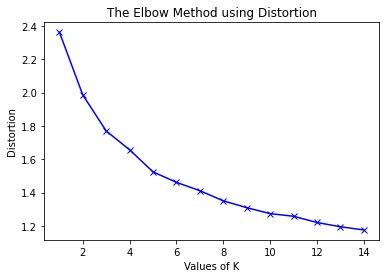

In [44]:
for key,val in mapping1.items():
    print(str(key)+ ' : ' + str(val))
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

1 : 4515.0
2 : 3205.7237084107114
3 : 2502.456416018545
4 : 2154.125426960883
5 : 1880.8797891137028
6 : 1725.9066099955755
7 : 1612.228580008863
8 : 1522.165423731134
9 : 1402.8322442814056
10 : 1341.917815254985
11 : 1307.1280821072178
12 : 1226.752753702543
13 : 1175.3873389740331
14 : 1128.9564645320115


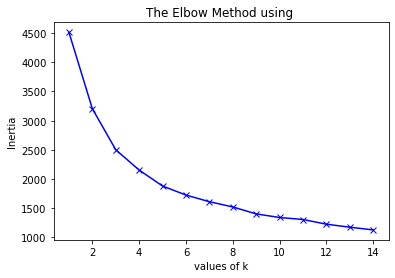

In [45]:
for key,val in mapping2.items():
    print(str(key) +' : '+ str(val))
plt.plot(K, inertias, 'bx-')
plt.xlabel('values of k')
plt.ylabel('Inertia')
plt.title('The Elbow Method using ')
plt.show()

In [46]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++')
kmeans.fit(scaled_data)
pred = kmeans.predict(scaled_data)

In [47]:
frame = pd.DataFrame(scaled_data)
frame['cluster'] = pred
frame['cluster'].value_counts()

5    210
0    139
1    112
4     94
3     71
2     19
Name: cluster, dtype: int64

In [48]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++')
kmeans.fit(scaled_data)
pred = kmeans.predict(scaled_data)

In [49]:
frame = pd.DataFrame(scaled_data)
frame['cluster'] = pred
frame['cluster'].value_counts()

7    124
1    114
3    109
0    108
4     82
6     61
5     30
2     17
Name: cluster, dtype: int64